In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score
import plotly. express as px
!pip install kneed
from kneed import KneeLocator
import seaborn as sns

# Data Preparation



In [3]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
df = pd.read_csv(url)
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


Insights : The data shows notable differences in Covid-19 impact across countries. Andorra records extremely high infections per population, meaning more than half of its citizens were infected during the pandemic. Albania also shows widespread transmission with very high cases per million people. In contrast, Afghanistan reports relatively low cases per million but has a high death percentage, which suggests many infections may have gone undetected and that its healthcare system faced more severe challenges. Angola appears to have lower case and death rates overall compared to the other countries listed. These differences highlight how population size, testing capacity, and healthcare strength influenced Covid-19 outcomes in each country.

In [4]:
df.shape

(225, 10)

In [5]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


Insights : This dataset contains 225 countries. There are only 1 missing values in the Other Names. The dataset includes both numeric and categorical variables. Numeric fields like population, total cases, and total deaths allow for statistical and comparative analysis. Categorical fields like country name and continent support grouping and segmentation. The presence of per-population metrics such as cases per 1 million people and death rate makes it possible to evaluate the pandemic’s severity more fairly across countries with different population sizes. The dataset size is small and efficient to process, so performing analysis or visualizations will be fast.

In [6]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'Country': array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
        'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
        'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
        'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
        'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
        'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei ',
        'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia',
        'Cameroon', 'Canada', 'CAR', 'Caribbean Netherlands',
        'Cayman Islands', 'Chad', 'Channel Islands', 'Chile', 'China',
        'Colombia', 'Comoros', 'Congo', 'Cook Islands', 'Costa Rica',
        'Croatia', 'Cuba', 'Curaçao', 'Cyprus', 'Czechia', 'Denmark',
        'Djibouti', 'Dominica', 'Dominican Republic',
        'Democratic Republic of the Congo', 'Ecuador', 'Egypt',
        'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
        'Eswatini', 'Ethiopia', 'Faeroe I

In [10]:
# drop "Other Names" Columns because the value is the same with the Country Columns
df = df.drop(columns=["Other names"])

# Exploratory Data Analysis (EDA)

In [11]:
fig = px. choropleth(df,
      locations="ISO 3166-1 alpha-3 CODE",
      color="Continent", # Color by Continent for better readability
      hover_name="Country",
      projection="natural earth",
      title="World Map of Countries by Continent"
)
fig. show( )

Insights : This map shows how countries are distributed across continents. Europe and Africa appear as the continents with the most countries on the map. Asia has a large land area and many countries, but still fewer than Africa. The Americas are divided into Northern America and Latin America, creating a clear separation between the two regions. Oceania has fewer countries and they are more spread out over the Pacific. The map helps you identify where each country in the dataset belongs so later analysis by continent can be more meaningful.

/tmp/ipython-input-3275208258.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




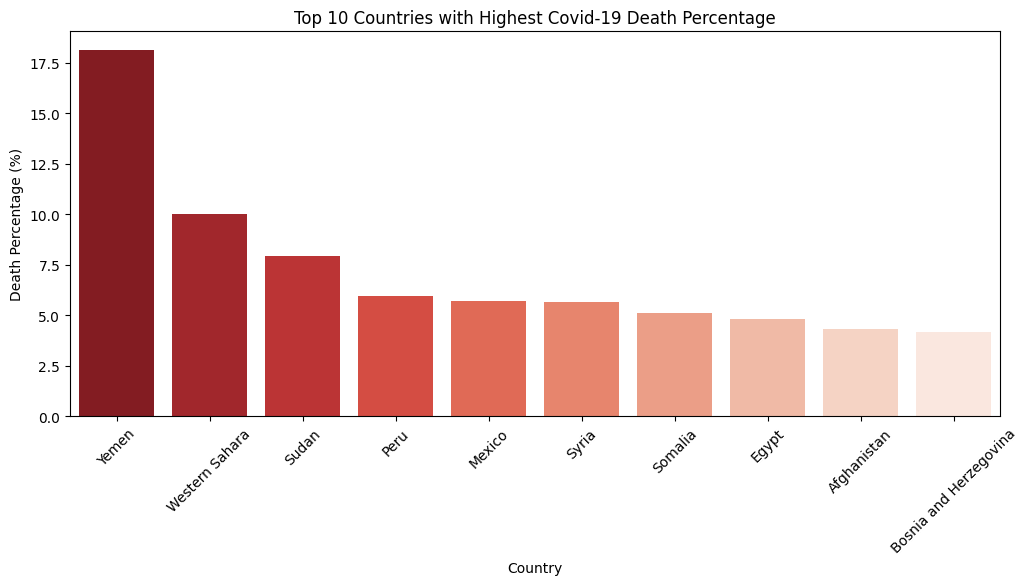

In [12]:
top_death = df.sort_values(by="Death percentage", ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(data=top_death, x="Country", y="Death percentage", palette="Reds_r")
plt.title("Top 10 Countries with Highest Covid-19 Death Percentage")
plt.xticks(rotation=45)
plt.ylabel("Death Percentage (%)")
plt.show()


Insights : This visualization shows the top 10 countries with the highest Covid-19 death percentage. Yemen is the worst affected, with a death rate close to 19 percent. This extremely high fatality rate suggests limited healthcare support and very low testing, meaning only severe cases were detected. Western Sahara and Sudan also have high death rates above 8 percent, indicating significant challenges in pandemic management and healthcare capacity. Other countries like Peru, Mexico, Syria, and Somalia fall between 5 and 6 percent. These values show that although infections may not be extremely widespread, a large portion of detected cases resulted in death. Egypt, Afghanistan, and Bosnia and Herzegovina show slightly lower but still concerning levels around 4 to 5 percent. These patterns highlight that countries struggling with political instability, conflict, or weaker medical systems experienced more severe outcomes, where many Covid-19 cases progressed to fatal stages before proper treatment was accessible.

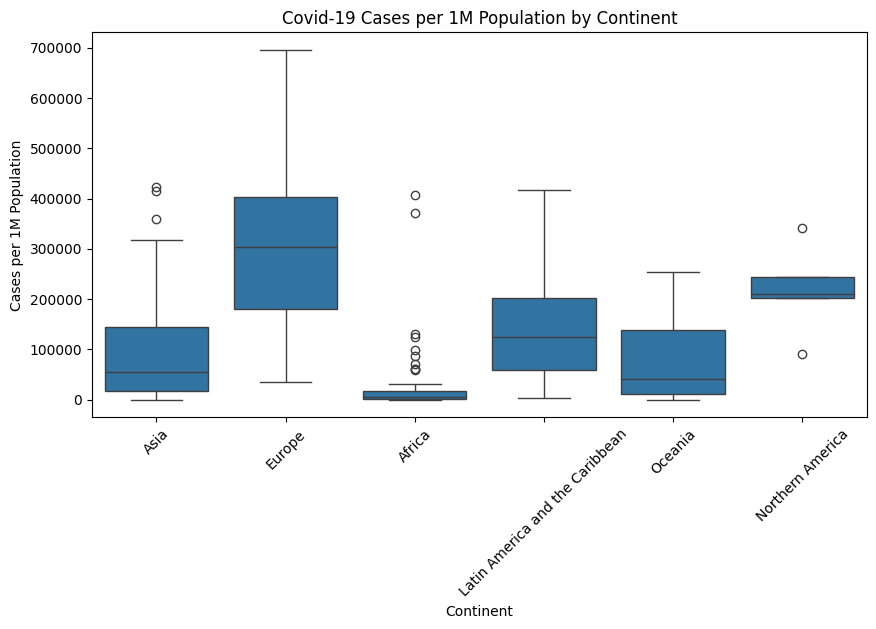

In [23]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x="Continent", y="Tot\xa0Cases//1M pop")
plt.title("Covid-19 Cases per 1M Population by Continent")
plt.xticks(rotation=45)
plt.ylabel("Cases per 1M Population")
plt.show()


Insights :      
Here is a clear and systematic interpretation of your boxplot:

Asia : Asia shows a wide variation. Some countries report low cases per population while others are much higher. This indicates different levels of pandemic control and healthcare capacity across the region.

Europe : Europe has the highest median cases per 1 million people. Many countries experienced widespread transmission. The distribution is concentrated at high values which shows strong pandemic impact across the region.

Africa : Africa shows the lowest cases per population. This can mean fewer outbreaks but can also indicate limited testing capacity. It suggests that many infections may not have been detected.

Latin America and the Caribbean : Latin America and the Caribbean are in the middle range. The impact is significant in some countries but less severe in others. The region experienced both strict lockdowns and large outbreaks.

Oceania : Oceania has moderate cases with relatively low variation. Countries like Australia and New Zealand applied strong border control. This helped keep case numbers lower compared to other regions.

Northern America : Northern America shows high values and a tight range. This reflects consistent high pandemic spread in both the United States and Canada.

These differences show that each continent faced Covid-19 with different conditions. Healthcare systems, government measures, and population behavior played important roles in shaping the spread of the virus.


# Encoding and Data Transformation

In [24]:
# drop "Country" and "ISO 3166-1 alpha-3 CODE" Columns because the value is always different per row
df = df.drop(columns=["Country", "ISO 3166-1 alpha-3 CODE"])

In [25]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. Nominal Encoding
# Columns: Continent
# Suppose you already fitted the encoder:
nominal_cols = ['Continent']
encoder = OrdinalEncoder()
df[nominal_cols] = encoder.fit_transform(df[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df.sample(n = 5)

{'Continent': {'Africa': 0,
               'Asia': 1,
               'Europe': 2,
               'Latin America and the Caribbean': 3,
               'Northern America': 4,
               'Oceania': 5}}


,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
189,46786482,2.0,11551574,102541,246900,2192,0.887680
62,3632329,0.0,9728,103,2678,28,1.058799
67,3657,3.0,123,0,33634,0,0.000000
80,56942,4.0,11971,21,210231,369,0.175424
39,17250246,0.0,7308,191,424,11,2.613574


In [27]:
# Create a StandardScaler object
sc = StandardScaler()
df_scaled = df.copy

# Fit and transform the selected columns
df_scaled= sc.fit_transform(df[['Population', 'Total Cases', 'Total Deaths', 'Tot\xa0Cases//1M pop', 'Tot\xa0Deaths/1M pop', 'Death percentage']])

df_scaled = pd.DataFrame(df_scaled, columns=['Population', 'Total Cases', 'Total Deaths', 'Tot\xa0Cases//1M pop', 'Tot\xa0Deaths/1M pop', 'Death percentage'])
df_scaled.head()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204


In [28]:
# get stastical information on the new dataset
df_scaled.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02,2.250000e+02
mean,-1.578984e-17,2.713879e-17,8.881784e-18,7.894919e-17,4.736952e-17,2.131628e-16
std,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00,1.002230e+00
min,-2.524428e-01,-3.009443e-01,-2.839181e-01,-9.457898e-01,-9.192494e-01,-8.309821e-01
25%,-2.483707e-01,-2.976287e-01,-2.819631e-01,-8.671993e-01,-8.161528e-01,-5.367737e-01
50%,-2.105007e-01,-2.783629e-01,-2.635925e-01,-3.310361e-01,-3.258152e-01,-2.343236e-01
75%,-9.477552e-02,-1.504507e-01,-1.426217e-01,5.971815e-01,5.852909e-01,3.066382e-01
max,1.010746e+01,1.097204e+01,1.014493e+01,3.863153e+00,4.349575e+00,9.613966e+00


In [29]:
df_cat = df[['Continent']]
df_cat.head()

,Continent
0,1.0
1,2.0
2,0.0
3,2.0
4,0.0


In [30]:
df = pd.concat([df_scaled, df_cat], axis=1)
df.head()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,1.0
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,2.0
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0.0
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2.0
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0.0


# K-Means

In [32]:
from sklearn.cluster import KMeans

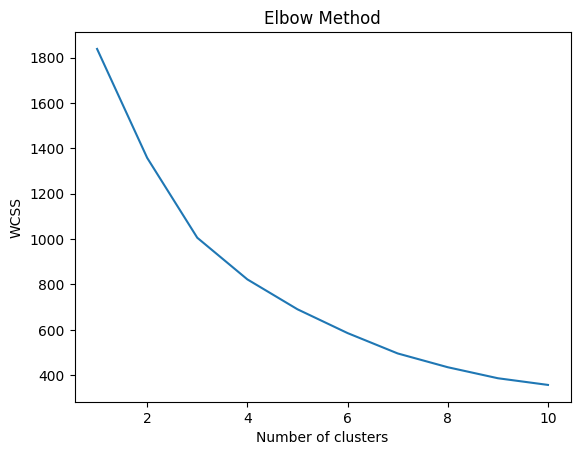

In [34]:
wcss = []
for i in range(1, 11):   #clusters 1-10
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [35]:
# Create a DataFrame to display the WCSS values for each number of clusters
wcss_table = pd.DataFrame({
    "Number of Clusters": range(1, 11),
    "WCSS": wcss
})

# Display the table
print(wcss_table)

   Number of Clusters         WCSS
0                   1  1838.062222
1                   2  1357.921919
2                   3  1005.938854
3                   4   822.409390
4                   5   690.698659
5                   6   585.817789
6                   7   496.095972
7                   8   435.311756
8                   9   386.825189
9                  10   357.382521


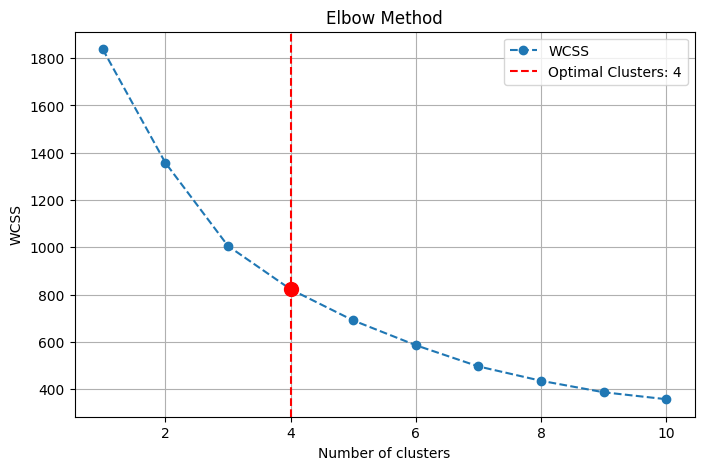

The optimal number of clusters is: 4


In [36]:
# Example WCSS values and cluster numbers
clusters = range(1, 11)

# Automatically find the elbow point using the KneeLocator
knee_locator = KneeLocator(clusters, wcss, curve="convex", direction="decreasing")
optimal_clusters = knee_locator.knee

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(clusters, wcss, marker='o', linestyle='--', label="WCSS")
plt.axvline(optimal_clusters, linestyle='--', color='red', label=f'Optimal Clusters: {optimal_clusters}')
plt.scatter(optimal_clusters, wcss[optimal_clusters-1], c='red', s=100, zorder=5)  # Highlight elbow point
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.legend()
plt.grid(True)
plt.show()

# Print the optimal number of clusters
print(f"The optimal number of clusters is: {optimal_clusters}")

Insights : This chart shows the Within-Cluster Sum of Squares (WCSS) for different numbers of clusters. WCSS decreases as the number of clusters increases. The “elbow point” occurs at 4 clusters, where the decrease in WCSS begins to slow down. This means that adding more clusters beyond 4 does not significantly improve the clustering quality. Therefore, the optimal number of clusters for the K-Means model is 4. This suggests that the Covid-19 dataset naturally forms 4 distinct groups of countries based on their pandemic indicators.

In [60]:
# Evaluation
ss = silhouette_score(dfk, clusters)
print(ss)

0.42140448474188624


# Hierarchical Agglomerative Clustering

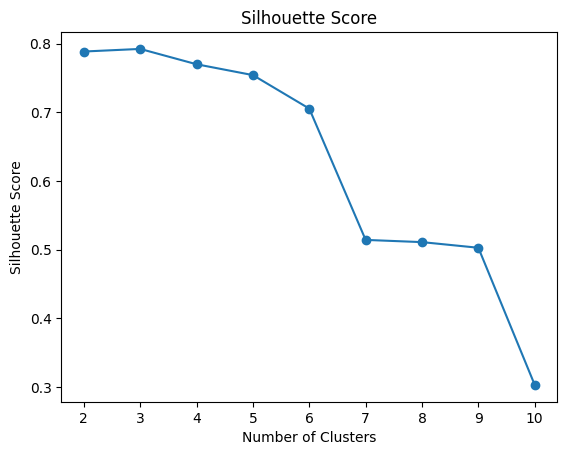

In [39]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Skipping Ward linkage with Manhattan metric (not supported).


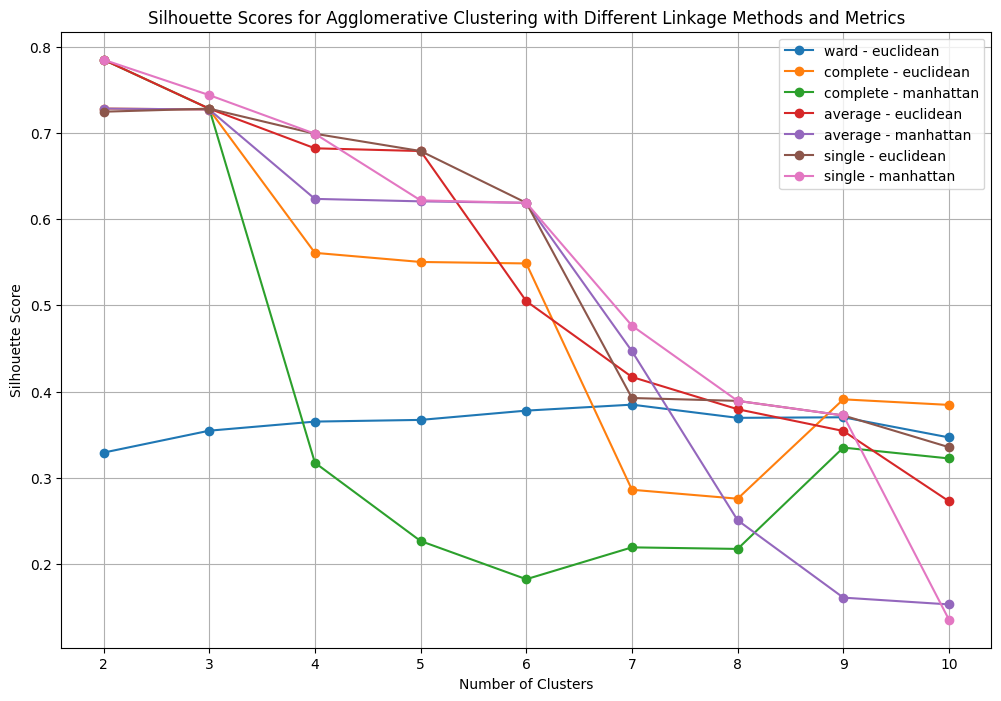

Best Silhouette Score: 0.7851185820031913
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: manhattan


In [31]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        # ward gabisa manhattan, bisanya eucladian
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df)
            silhouette_avg = silhouette_score(df, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

Insights : This chart compares silhouette scores using different hierarchical agglomerative clustering parameters. The goal is to find the best combination of linkage method, distance metric, and number of clusters. The score is highest when using 2 clusters, consistent across most methods, showing that the dataset naturally forms two main groups. The best performing configuration is Complete Linkage with Manhattan Distance, achieving a silhouette score of approximately 0.79. This indicates strong cluster separation and compactness. As the number of clusters increases above 3, all methods show a decline in performance. This means forcing more clusters reduces the quality of the grouping and causes overlap between segments. The main insight is that the hierarchical clustering structure of this Covid-19 dataset is most optimal when divided into 2 main clusters, using complete linkage with Manhattan distance.

In [45]:
# Hierarchical Clustering using Best Combination
agglo = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc = agglo.fit_predict(df)

# Evaluation
ss = silhouette_score(df, y_hc)
print("Complete Manhattan Score: ", ss)

Complete Manhattan Score:  0.7851185820031913


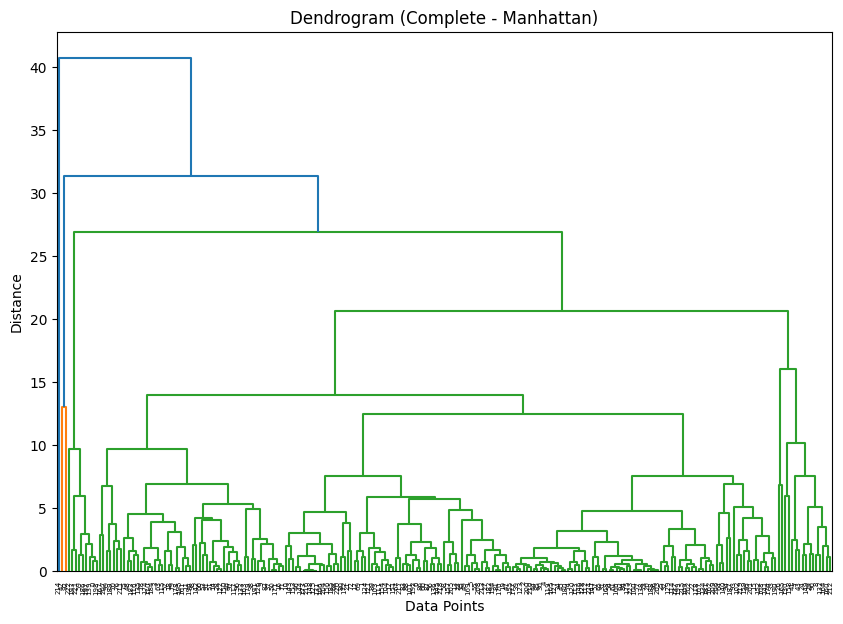

In [47]:
from scipy.cluster.hierarchy import linkage
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Average linkage + Manhattan distance
linked = linkage(df, method='complete', metric='cityblock')
# 'cityblock' = nama resmi untuk Manhattan di SciPy

plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram (Complete - Manhattan)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

# Evaluate both models

## Agglomerative

In [50]:
# Add the cluster labels to the original data on best model
df['Agglo'] = y_hc

# Analyze the clusters with the original values
df.head()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent,Agglo
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,1.0,0
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,2.0,0
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0.0,0
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2.0,0
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0.0,0


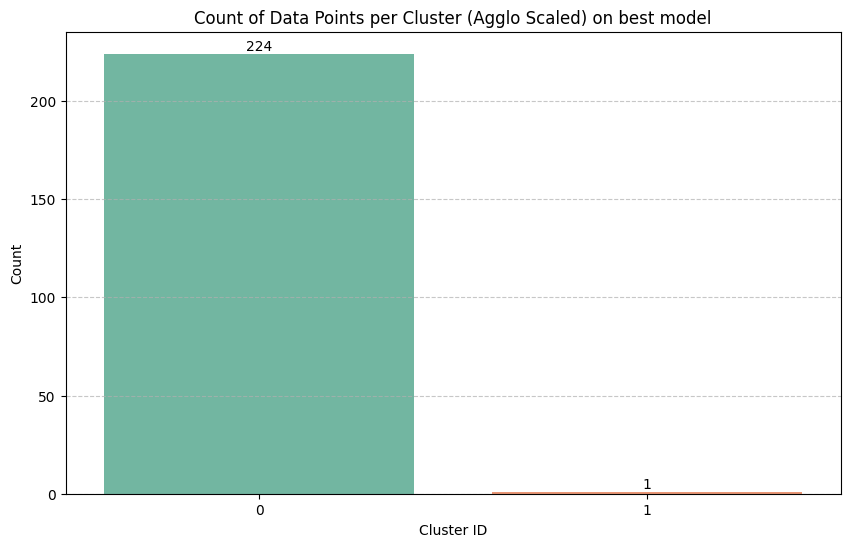

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo Scaled) on best model')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Insights : The bar chart shows a very strong imbalance in the cluster distribution produced by the Agglomerative clustering model. Almost all countries are grouped into Cluster 0 with 224 data points. Only 1 country is placed in Cluster 1. This suggests that the hierarchical model failed to separate the data into meaningful segments. The clustering result indicates that the features used did not provide enough differentiation for the model to form more than one dominant group. This imbalance reduces the practical value of the model because insights cannot be compared across clusters when one cluster contains almost the entire dataset. It also suggests the need to revisit scaling, distance metrics, linkage criteria, or the number of clusters to improve the segmentation quality.


In [54]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/COVID-19%20Coronavirus%20(2).csv"
data = pd.read_csv(url)
data = data[["Country", "ISO 3166-1 alpha-3 CODE"]]
data.head()

,Country,ISO 3166-1 alpha-3 CODE
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Andorra,AND
4,Angola,AGO


In [56]:
# Gabungkan kolom Country dan ISO ke dataframe utama
dfagglo = pd.concat([df.reset_index(drop=True),
                    data.reset_index(drop=True)], axis=1)

dfagglo.head()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent,Agglo,Country,ISO 3166-1 alpha-3 CODE
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,1.0,0,Afghanistan,AFG
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,2.0,0,Albania,ALB
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0.0,0,Algeria,DZA
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2.0,0,Andorra,AND
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0.0,0,Angola,AGO


In [61]:
fig = px.choropleth(
    dfagglo,
    locations="ISO 3166-1 alpha-3 CODE",
    color="Agglo", # Color by Agglo Cluster
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by Agglomerative Cluster"
)
fig.show()

Insights : The map confirms the severe imbalance found in the Agglomerative clustering results. Almost every country falls into the same cluster. Only one country is highlighted differently, which means the model did not recognize meaningful variation across nations. This suggests Agglomerative clustering with the chosen distance metric and linkage produced an oversimplified segmentation. The geographic visualization clearly shows that the model failed to differentiate regional or economic patterns. It indicates the model is not capturing the underlying structure of the data and requires parameter tuning or a different clustering approach.


## Kmeans

In [58]:
# Gabungkan kolom Country dan ISO ke dataframe utama
dfkm = pd.concat([dfk.reset_index(drop=True),
                    data.reset_index(drop=True)], axis=1)

dfkm.head()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent,KMeans_Cluster,Country,ISO 3166-1 alpha-3 CODE
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,1.0,0,Afghanistan,AFG
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,2.0,1,Albania,ALB
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0.0,0,Algeria,DZA
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2.0,2,Andorra,AND
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0.0,0,Angola,AGO


In [38]:
# Fit K-Means to the data with the optimal number of K cluster = 4
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
clusters = kmeans.fit_predict(df)

dfk = df.copy()
# Add the cluster labels to the DataFrame
dfk['KMeans_Cluster'] = clusters

# Show the df
dfk.head()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage,Continent,KMeans_Cluster
0,0.038789,-0.276449,-0.204571,-0.915487,-0.759994,1.651243,1.0,0
1,-0.231774,-0.263220,-0.247798,-0.287081,0.099982,-0.097285,2.0,1
2,0.073154,-0.264347,-0.212815,-0.905275,-0.791845,0.657760,0.0,0
3,-0.251891,-0.295431,-0.282336,2.623123,0.736164,-0.611015,2.0,2
4,-0.003016,-0.287281,-0.264265,-0.926078,-0.873149,0.271204,0.0,0


/tmp/ipython-input-3986243653.py:9: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




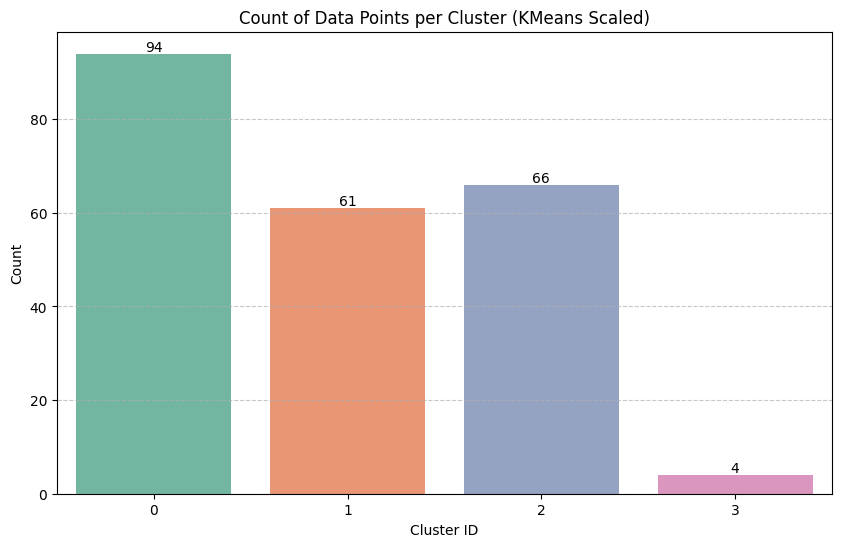

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung jumlah data per cluster
cluster_counts = dfk['KMeans_Cluster'].value_counts().sort_index()

# Plot bar
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x=cluster_counts.index,
    y=cluster_counts.values,
    palette='Set2'
)

# Label jumlah pada setiap bar
for i, value in enumerate(cluster_counts.values):
    ax.text(i, value + 0.5, str(value), ha='center')

plt.title('Count of Data Points per Cluster (KMeans Scaled)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Insights : The KMeans results create four clusters with a more even distribution of countries. Cluster 0 has the largest group with 94 countries. Cluster 2 and Cluster 1 follow with 66 and 61 countries, showing meaningful segmentation across most of the dataset. Cluster 3 only includes 4 countries, indicating a very small group that is likely highly distinct in the data. This suggests that KMeans could successfully identify different country profiles. The structure provides a good basis for deeper interpretation because each major cluster has enough members to compare their characteristics and find useful patterns.


In [62]:
fig = px.choropleth(
    dfkm,
    locations="ISO 3166-1 alpha-3 CODE",
    color="KMeans_Cluster", # Color by KMeans Cluster
    hover_name="Country",
    projection="natural earth",
    title="World Map of Countries by KMeans Cluster"
)
fig.show()

Insights : The map shows that KMeans clusters reflect clear geographic and economic differences between countries. Cluster 0 is mostly concentrated in Africa and parts of Asia, suggesting a group of developing nations with similar development profiles. Cluster 1 includes many South American and a few Asian countries, indicating a mid-level development group. Cluster 2 covers Western Europe, North America, and other advanced economies such as Australia and Japan. Cluster 3 consists of a very small set of unique countries that show distinct characteristics compared to the rest of the world. This spatial distribution suggests that KMeans was able to capture real-world regional and economic patterns in the dataset.


## Cluster Summary


In [67]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = df.groupby(y_hc).agg({
'Continent': ['first', 'count'],
'Population': ['mean', 'std', 'min', 'max'],
'Total Cases': ['mean', 'std', 'min', 'max'],
'Total Deaths': ['mean', 'std', 'min', 'max'],
'Tot\xa0Cases//1M pop': ['mean', 'std', 'min', 'max'],
'Tot\xa0Deaths/1M pop': ['mean', 'std', 'min', 'max'],
'Death percentage': ['mean', 'std', 'min', 'max']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

pd.set_option('display.max_columns', None)
cluster_summary = cluster_summary.rename_axis('cluster')
print("AGGLOMERATIVE")
cluster_summary

AGGLOMERATIVE


Continent       Population                                Total Cases  \
             mode count       mean       std       min        max        mean   
cluster                                                                         
0             1.0   224  -0.009618  0.994012 -0.252443  10.107461   -0.048982   
1             4.0     1   2.154487       NaN  2.154487   2.154487   10.972039   

                                        Total Deaths                       \
              std        min        max         mean       std        min   
cluster                                                                     
0        0.683164  -0.300944   5.626124    -0.045290  0.738502  -0.283918   
1             NaN  10.972039  10.972039    10.144935       NaN  10.144935   

                   Tot Cases//1M pop                                \
               max              mean       std       min       max   
cluster                                                              
0         6.545776         -0.003326  1.003229 -0.945790  3.863153   
1        10.144935          0.745028       NaN  0.745028  0.745028   

        Tot Deaths/1M pop                               Death percentage  \
                     mean       std       min       max             mean   
cluster                                                                    
0               -0.007178  0.998661 -0.919249  4.349575         0.000545   
1                1.607875       NaN  1.607875  1.607875        -0.122086   

                                       
              std       min       max  
cluster                                
0        1.004441 -0.830982  9.613966  
1             NaN -0.122086 -0.122086

In [69]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_summary = dfk.groupby("KMeans_Cluster").agg({
'Continent': ['first', 'count'],
'Population': ['mean', 'std', 'min', 'max'],
'Total Cases': ['mean', 'std', 'min', 'max'],
'Total Deaths': ['mean', 'std', 'min', 'max'],
'Tot\xa0Cases//1M pop': ['mean', 'std', 'min', 'max'],
'Tot\xa0Deaths/1M pop': ['mean', 'std', 'min', 'max'],
'Death percentage': ['mean', 'std', 'min', 'max']
})

# Rename the <lambda> column in the Gender MultiIndex level
cluster_summary = cluster_summary.rename(columns={'first': 'mode'}, level=1)

pd.set_option('display.max_columns', None)
cluster_summary = cluster_summary.rename_axis('cluster')
print("KMEANS Scaled")
cluster_summary

KMEANS Scaled


Continent       Population                                Total Cases  \
             mode count       mean       std       min        max        mean   
cluster                                                                         
0             1.0    94  -0.017849  0.360172 -0.252405   1.752751   -0.193873   
1             2.0    61  -0.221861  0.055657 -0.252443   0.023380   -0.256288   
2             2.0    66  -0.124221  0.220642 -0.252377   0.798741    0.207693   
3             3.0     4   5.852483  4.779410  1.296542  10.107461    5.037484   

                                       Total Deaths                      \
              std       min        max         mean       std       min   
cluster                                                                   
0        0.230156 -0.300944   1.051489    -0.176436  0.257765 -0.283918   
1        0.106785 -0.300944   0.343818    -0.246941  0.079687 -0.283918   
2        0.805804 -0.300373   3.280150     0.152793  0.767878 -0.283856   
3        4.665182 -0.279630  10.972039     5.390996  4.307950 -0.235944   

                   Tot Cases//1M pop                                \
               max              mean       std       min       max   
cluster                                                              
0         1.322351         -0.705233  0.328096 -0.945741  0.346922   
1         0.105940         -0.179999  0.594360 -0.945790  1.408083   
2         3.540270          1.184677  0.880992 -0.647747  3.863153   
3        10.144935         -0.229217  0.769694 -0.945106  0.745028   

        Tot Deaths/1M pop                               Death percentage  \
                     mean       std       min       max             mean   
cluster                                                                    
0               -0.619991  0.390317 -0.919249  1.052998         0.283143   
1               -0.137691  0.657270 -0.919249  1.317864        -0.224993   
2                0.983987  1.089767 -0.673662  4.349575        -0.211580   
3                0.433789  1.387212 -0.916735  1.652299         0.268349   

                                       
              std       min       max  
cluster                                
0        1.323969 -0.830982  9.613966  
1        0.527555 -0.830982  1.539326  
2        0.687048 -0.799019  2.612058  
3        0.494356 -0.133736  0.893746

## Cluster Profiling

Insights AGGLO SCALED : Cluster 0 includes almost all countries. The mean values for population, cases per million, and deaths per million are close to zero after scaling. This means most countries have average Covid-19 figures compared to the global distribution. The high standard deviations show this cluster still contains a wide variety of Covid-19 situations, so the model did not clearly separate different risk levels. This confirms that the segmentation does not provide strong differentiation between nations.

Cluster 1 contains only one country. All statistics match its own single value because there is no variation. This cluster has very high scaled values for total cases and deaths per million, suggesting an extreme outlier where the Covid-19 impact is significantly worse than the global average. This outlier would be better handled by adjusting distance metrics, removing extreme records, or testing more clusters.

Overall, the summary shows that the Agglomerative model did not successfully produce meaningful or useful segments for analysis due to one dominant cluster and a single-country outlier cluster.


Insights KMEANS Scaled : Cluster 0 has the largest count. The average values for total cases per million and total deaths per million are low after scaling. This shows that most countries in this group experienced relatively lower Covid-19 impact. They also show moderate variation, which means the situation is not uniform but still within a lower-risk range.

Cluster 1 contains 61 countries. They show negative mean values for cases and deaths per million, indicating lower than average Covid-19 burden. The small standard deviation suggests the group is more consistent and represents countries with stable and moderate outcomes.

Cluster 2 includes 66 countries with higher mean values for cases and deaths per million compared to clusters 0 and 1. This suggests more severe pandemic effects and higher transmission or mortality rates. The wider variation indicates differences in how countries managed Covid-19 within this group.

Cluster 3 has only 4 countries. The mean values are very high for population, total cases, and total deaths. It reflects extreme outliers with major Covid-19 impact. These countries experienced significantly worse conditions than the rest of the world.

KMeans produces four meaningful clusters that separate countries into different Covid-19 severity groups. This provides a useful basis to compare policies and health system responses across clusters.

## Government Policy

### AGGLOMERATIVE

**Cluster 0 (n = 224)**

Average Total Cases per 1M: low (negative mean on scaled values)
Average Total Deaths per 1M: low
Death Percentage: very low
Geographical spread: most countries across all continents
Variation: high (wide standard deviation)

**Meaning:** This cluster represents the majority of countries where Covid-19 impact remains low to moderate. Healthcare systems are generally able to manage case levels without extreme stress. However, the wide variation inside this cluster indicates that some countries still face local vulnerabilities and need to improve prevention and preparedness.

**Managerial (Government Policy) Strategies:**

- Maintain Stable Covid-19 Control : Continue routine vaccination and booster rollout, Masking guidance for hospitals and high-risk zones,
- Improve Early Detection and Preparedness : Strengthen testing and digital case surveillance, Fast containment response for rising clusters
- Sustain Public Education : Clear health communication campaigns, Promote hygiene and home-isolation awareness
- Balanced International Collaboration : Participate in global research and data sharing, Support regional medical preparedness

**Key Performance Indicators (KPIs):**

- Vaccination and booster coverage rate
- Hospitalization rate per 100K population
- Case detection speed and surveillance accuracy
- Public compliance with basic health protocols

**Cluster 1 (n = 1)**

Average Total Cases per 1M: extremely high
Average Total Deaths per 1M: extremely high
Death Percentage: far above global average
Variation: none (only one extreme country)

**Meaning:** This cluster indicates a crisis-level Covid-19 situation, with very high infection and fatality rates. The country in this group faces severe pandemic pressure, suggesting health system overload, slower policy response, or lack of medical resources.

**Managerial (Government Policy) Strategies:**

- National Health Emergency Response : Expand ICU capacity, oxygen supply, and medical workforce
- Immediate international support for medicines and equipment : Strict Mobility and Restriction Measures, Travel control and crowd-management policies
- Intensive contact tracing and rapid testing deployment : Accelerated Vaccination Plan, Prioritize high-risk populations
- Mobile vaccination in densely populated areas : International Partnership Priority, Coordination with WHO and global health donors
- Urgent funding for pandemic infrastructure upgrades

**Key Performance Indicators (KPIs):**

- Reduction in weekly death rate
- Drop in positivity rate
- Increased hospital treatment capacity
- Booster coverage within next 3–6 months

### KMEANS

**Cluster 0 (n = 94)**

Average Total Cases per 1M: low
Average Total Deaths per 1M: low
Death Percentage: low
Most countries in Africa and parts of Asia
Variation: moderate

**Meaning:** Countries in this group have lower levels of Covid-19 transmission and fatality. Their healthcare systems can manage the pandemic relatively well. However, low cases may also result from limited testing, so continuous surveillance remains important.

**Managerial Strategies:**

- Sustained Preventive Measures : Basic masking guidance for high-risk areas, Hygiene and sanitation programs
- Boost Vaccination Confidence : Public communication on booster importance,  Local vaccination access points
- Strengthen Monitoring : Digital case reporting in hospitals, Increase test availability in rural areas
- Targeted Awareness Campaigns : Education for elderly and high-risk groups

**KPIs:**

- Booster coverage rate
- Hospital response time
- Positivity rate tracking
- Public health awareness engagement

**Cluster 1 (n = 61)**

Average Total Cases per 1M: moderately low
Average Total Deaths per 1M: moderately low but with variation
Death Percentage: slightly negative scaled mean
Most countries in South America + mixed regions
Variation: small deviations

**Meaning:**
These countries have controlled fatality outcomes, but still face moderate infection rates. Policies are generally effective, but community spread remains noticeable.

**Managerial Strategies:**
- Improve Public Compliance
- Strict enforcement in crowded urban zones
- Strengthen Outbreak Prevention
- Surveillance focus during holiday seasons
- Expand Healthcare Capacity Moderately
- Supplies stockpile readiness
- Continue Vaccination for At-Risk Groups
- Nursing home protection priority

**KPIs:**
- Decline in new cases per 1M
- Hospital bed utilization rate
- Booster completion rate
- Community mobility compliance

**Cluster 2 (n = 66)**

Average Total Cases per 1M: high
Average Total Deaths per 1M: high
Death Percentage: slightly high
Countries include parts of Europe and Asia
Variation: wide range

**Meaning:**
Countries in this group experience significant Covid-19 spread and increased mortality, indicating higher medical burden and system stress.

**Managerial Strategies:**
- Reinforce Health System Infrastructure
- Add ICU beds and ventilators
- Strengthen emergency staffing
- Stronger Public Restrictions
- Indoor mask mandates
- Event and travel limitations
- Focused Protection for Vulnerable Groups
- Elderly, comorbid patients, low-income communities
- International Support Collaboration
- Vaccine supply continuity guarantee

**KPIs:**
- Weekly hospitalization reduction
- ICU occupancy rate
- Speed of outbreak control
- Booster distribution efficiency

**Cluster 3 (n = 4)**

Average Total Cases per 1M: extremely high
Average Total Deaths per 1M: extremely high
Death Percentage: very high
Only a few critical countries
Variation: very high risk

**Meaning:**
This is a critical risk group. Countries experienced the worst Covid-19 outcomes, with overwhelmed hospitals and severe public health impact.

**Managerial Strategies:**
- National Crisis Management
- Military medical assistance
- Immediate field hospitals
- Strict Movement and Border Controls
- Temporary lockdowns in urban epicenters
- Aggressive Testing + Vaccination Acceleration
- Mobile vaccination units
- Free mass test programs
- Global Aid Priority
- WHO supply chains for essential medicine
- Emergency financial support

**KPIs:**
- Rapid drop in death rate
- Decrease in positivity rate
- Recovery rate improvements
- Increase in healthcare service capacity

## Best Models

**silhouette score Agglo** : 0.7851

**silhouette score Agglo** : 0.42140448474188624


**Best Models : KMEANS**


KMeans is the more effective model for this Covid-19 country segmentation. The Agglomerative model may appear strong based on its silhouette score, but its result shows one dominant cluster containing almost every country and a single-country outlier cluster. This indicates that the model failed to recognize variation in the data and produced a segmentation that has no practical value. KMeans, on the other hand, forms four clusters with balanced membership and clear differences in Covid-19 severity, as shown by the cluster statistics and the world map. These clusters reflect real global patterns, such as regions with higher transmission and mortality being grouped separately from countries with lower impact. Because KMeans provides meaningful grouping that supports deeper insight and policy comparison, it is the more suitable and reliable model for this analysis.
